# Capstone Pre-processing and Training Data Development- Jessica Williams

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from sb_utils import save_file


First let’s import the data. I will be using two different train test splits for my data. The first train test split will use the rating mean of recipes column of the data as the target variable(y). The second train test split will use the polarity average of the reviews column as the target variable.

In [2]:
recipe_attributes_p = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes_p.csv')

In [3]:
recipe_attributes_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231634 entries, 0 to 231633
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   recipe_id                   231634 non-null  int64  
 1   minutes                     231634 non-null  int64  
 2   n_steps                     231634 non-null  float64
 3   n_ingredients               231634 non-null  float64
 4   rating_mean                 231634 non-null  float64
 5   review_count                231634 non-null  int64  
 6   polarity_avg                231634 non-null  float64
 7   ingr_baking powder          231634 non-null  int64  
 8   ingr_baking soda            231634 non-null  int64  
 9   ingr_black pepper           231634 non-null  int64  
 10  ingr_brown sugar            231634 non-null  int64  
 11  ingr_cheddar cheese         231634 non-null  int64  
 12  ingr_cream cheese           231634 non-null  int64  
 13  ingr_garlic cl

In [4]:
len(recipe_attributes_p) * .7, len(recipe_attributes_p) * .3

(162143.8, 69490.2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(recipe_attributes_p.drop(columns='rating_mean'), 
                                                    recipe_attributes_p.rating_mean, test_size=0.3, 
                                                    random_state=22)

In [6]:
X_train.shape, X_test.shape

((162143, 58), (69491, 58))

In [7]:
y_train.shape, y_test.shape

((162143,), (69491,))

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(recipe_attributes_p.drop(columns='polarity_avg'), 
                                                    recipe_attributes_p.polarity_avg, test_size=0.3, 
                                                    random_state=22)

In [9]:
X_train2.shape, X_test2.shape

((162143, 58), (69491, 58))

In [10]:
y_train2.shape, y_test2.shape

((162143,), (69491,))

In [11]:
#names_list = ['', '',]
#names_train = X_train[names_list]
#names_test = X_test[names_list]
#X_train.drop(columns=names_list, inplace=True)
#X_test.drop(columns=names_list, inplace=True)
#X_train.shape, X_test.shape


id_vars = ['recipe_id']
id_train = X_train[id_vars]
id_test = X_test[id_vars]
X_train.drop(columns=id_vars, inplace=True)
X_test.drop(columns=id_vars, inplace=True)
X_train.shape, X_test.shape

((162143, 57), (69491, 57))

In [12]:
#names_list = ['', '',]
#names_train = X_train[names_list]
#names_test = X_test[names_list]
#X_train.drop(columns=names_list, inplace=True)
#X_test.drop(columns=names_list, inplace=True)
#X_train.shape, X_test.shape


id_vars = ['recipe_id']
id_train = X_train2[id_vars]
id_test = X_test2[id_vars]
X_train2.drop(columns=id_vars, inplace=True)
X_test2.drop(columns=id_vars, inplace=True)
X_train2.shape, X_test2.shape

((162143, 57), (69491, 57))

Now that we have the train test split imported I will create a pipeline based on imputing the mean as my base linear regression pipeline. We will work with the rating mean target variable first.

In [13]:
pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LinearRegression()
)

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [15]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

Let's see how the first model performed.

Using $R^2$

In [16]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06958851821260514, 0.06378735916930367)

It looks like the r2 score for the model is extremely low.The score for the train and test set are very similar.

Using Mean Absolute Error

In [17]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6466426445454803, 0.6420365805554163)

From this statistic we can see that on average, using the mean would generally give us a values that is off by about .64. With the range of values we are dealing with (0-5) this is pretty significant.

Next, let’s create a pipeline that uses the most frequent value of the column to impute values.

In [18]:
pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    LinearRegression()
)

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [21]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06958851821260514, 0.06378735916930367)

In [22]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6466426445454803, 0.6420365805554163)

It looks like we get the exact same values as we did using the mean. How can that be? 

In [23]:
counts = recipe_attributes_p.isna().sum()
print(counts.sum())

0


In hindsight I already handled all missing values for this dataset. So each imputer value creates the same statistics because there were no values to impute.

It’s time to start refining the model and selecting features. Let’s start with the default k of 10.

In [24]:
pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression),
    LinearRegression()
)

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000203DA3D2820>)),
                ('linearregression', LinearRegression())])

In [26]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [27]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06663060309278446, 0.06151349741959233)

In [28]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6479478379980013, 0.6432776278982002)

These values aren’t much different than the values we got using all the features. Let’s try a different number of features. We’ll go with 20.

In [29]:
pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression,k=20),
    LinearRegression()
)

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_regression at 0x00000203DA3D2820>)),
                ('linearregression', LinearRegression())])

In [31]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [32]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06799402366461238, 0.062257309606375544)

In [33]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6474116176208882, 0.6429011599748883)

These values still sit in about the same place. I think using a GridSearch for the parameters could be helpful here.

In [34]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [35]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [36]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=20,
                                                    score_func=<function f_regression at 0x00000203DA3D2820>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [37]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [38]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 54}

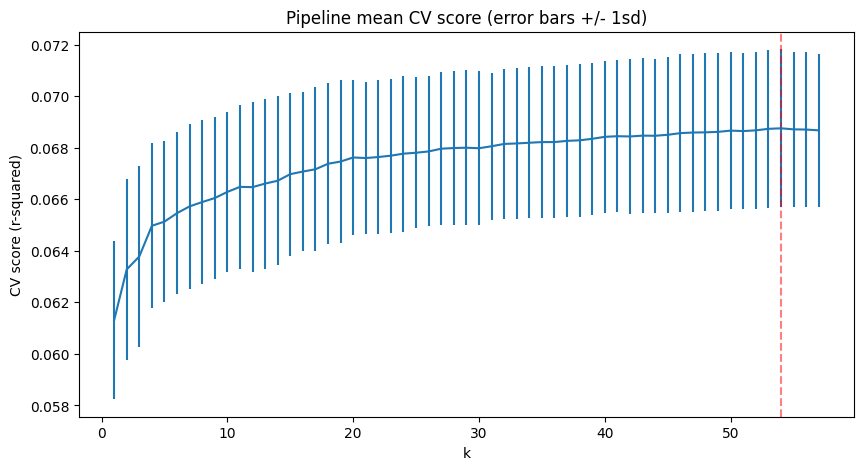

In [39]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The grid search suggests that the k best parameters is 54. This could explain why the model performance when trying to scale down the parameters weren’t much different from using all of them. The suggested number of parameters are almost all of the features (54 of 57).

I would like to try the linear regression model using the polarity average target variable next. Since we have a suggested best k of 54 from the first target variable let’s start with that.

In [40]:
pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression, k=54),
    LinearRegression()
)

In [41]:
pipe.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=54,
                             score_func=<function f_regression at 0x00000203DA3D2820>)),
                ('linearregression', LinearRegression())])

In [42]:
y_tr_pred2 = pipe.predict(X_train2)
y_te_pred2 = pipe.predict(X_test2)

In [43]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)

(0.06830724412360278, 0.06370234416311371)

In [44]:
mean_absolute_error(y_train2, y_tr_pred2), mean_absolute_error(y_test2, y_te_pred2)

(0.12140483645352461, 0.12121313686153905)

We are still not seeing much predictive powers from our features let’s take a stab at selecting the best parameters of the test train split with polarity average as the y.

In [45]:
k = [k+1 for k in range(len(X_train2.columns))]
grid_params2 = {'selectkbest__k': k}

In [46]:
lr_grid_cv2 = GridSearchCV(pipe, param_grid=grid_params2, cv=5, n_jobs=-1)

In [47]:
lr_grid_cv2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=54,
                                                    score_func=<function f_regression at 0x00000203DA3D2820>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [48]:
score_mean2 = lr_grid_cv2.cv_results_['mean_test_score']
score_std2 = lr_grid_cv2.cv_results_['std_test_score']
cv_k2 = [k for k in lr_grid_cv2.cv_results_['param_selectkbest__k']]

In [49]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv2.best_params_

{'selectkbest__k': 57}

It looks like with polarity average as are target variable, the best number of features is our total number of features(57).

In [50]:
pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression, k=57),
    LinearRegression()
)

In [51]:
pipe.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=57,
                             score_func=<function f_regression at 0x00000203DA3D2820>)),
                ('linearregression', LinearRegression())])

In [52]:
y_tr_pred2 = pipe.predict(X_train2)
y_te_pred2 = pipe.predict(X_test2)

In [53]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)

(0.06835631102931283, 0.06364306918429008)

In [54]:
mean_absolute_error(y_train2, y_tr_pred2), mean_absolute_error(y_test2, y_te_pred2)

(0.12140068348072551, 0.12121129952077533)

We may be getting the best results available for a linear regression model on our data. Let’s try building a Lasso regression model.

First let’s find the best alpha for our model.

In [55]:
alphas= np.random.uniform(0,100,500)

#Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=10, random_state=22))
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([4.95632953e+01, 7.21851993e+01, 3.55255918e+01, 9.36579548e+01,
       6.48493890e+01, 2.00036825e+01, 6.64271852e+01, 1.50174046e+01,
       5.25098310e+01, 8.70889205e+01, 9.01214298e+01, 4.59436448e+01,
       3.73486656e+01, 2.07930243e+01, 6.06080715e+01, 6.52639040e+01,
       5.02627135e+01, 2.72094597e+01, 1.408...
       9.98878858e+01, 8.19495691e+01, 9.03538773e+00, 5.58157496e+01,
       3.71866949e+01, 2.45328606e+01, 1.79449364e+01, 1.80287787e+01,
       9.88680654e+01, 1.08622339e+01, 4.05765524e+01, 1.57639839e+01,
       9.47725226e+01, 3.93235582e+01, 8.48719942e+01, 4.22664390e+01,
       8.75516964e+01, 1.96759959e+01, 3.19435147e+01, 9.52501037e+01,
       3.46182142e+01, 5.40339809e+01, 8.09670348e+01, 6.10260078e+01]),
                         cv=10, random_state=22))])

In [56]:
best_alpha=pipeline.named_steps['lasso'].alpha_
print(best_alpha)

0.024234984766979828


Now let’s apply the best alpha to our first train test split.

In [57]:
lasso_best=Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.024234984766979828)

In [58]:
print('R squared Training',lasso_best.score(X_train, y_train))
print('R squared Test',lasso_best.score(X_train, y_train))

R squared Training 0.042837817408110546
R squared Test 0.042837817408110546


In [59]:
y_tr_pred = pipeline.predict(X_train)
y_te_pred = pipeline.predict(X_test)

In [60]:
mean_absolute_error(y_train, y_tr_pred),mean_absolute_error(y_test, y_te_pred)

(0.6500554457497885, 0.6453705592097755)

It looks like our R squared is lower than it was with the linear regression model but our mean absolute error increased very slightly. Overall these statistics still show us our features don’t have much predictive power for our y.

Let’s try the same Lasso regression model on our second target variable of polarity average.

In [61]:
steps = [
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=10, random_state=22))
]

pipeline2 = Pipeline(steps)

pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([4.95632953e+01, 7.21851993e+01, 3.55255918e+01, 9.36579548e+01,
       6.48493890e+01, 2.00036825e+01, 6.64271852e+01, 1.50174046e+01,
       5.25098310e+01, 8.70889205e+01, 9.01214298e+01, 4.59436448e+01,
       3.73486656e+01, 2.07930243e+01, 6.06080715e+01, 6.52639040e+01,
       5.02627135e+01, 2.72094597e+01, 1.408...
       9.98878858e+01, 8.19495691e+01, 9.03538773e+00, 5.58157496e+01,
       3.71866949e+01, 2.45328606e+01, 1.79449364e+01, 1.80287787e+01,
       9.88680654e+01, 1.08622339e+01, 4.05765524e+01, 1.57639839e+01,
       9.47725226e+01, 3.93235582e+01, 8.48719942e+01, 4.22664390e+01,
       8.75516964e+01, 1.96759959e+01, 3.19435147e+01, 9.52501037e+01,
       3.46182142e+01, 5.40339809e+01, 8.09670348e+01, 6.10260078e+01]),
                         cv=10, random_state=22))])

In [62]:
best_alpha=pipeline2.named_steps['lasso'].alpha_
print(best_alpha)

0.024234984766979828


In [63]:
lasso_best=Lasso(alpha=best_alpha)
lasso_best.fit(X_train2, y_train2)

Lasso(alpha=0.024234984766979828)

In [64]:
print('R squared Training',lasso_best.score(X_train2, y_train2))
print('R squared Test',lasso_best.score(X_train2, y_train2))

R squared Training 0.0417242825550993
R squared Test 0.0417242825550993


In [65]:
y_tr_pred2 = pipeline2.predict(X_train2)
y_te_pred2 = pipeline2.predict(X_test2)

In [66]:
mean_absolute_error(y_train2, y_tr_pred2),mean_absolute_error(y_test2, y_te_pred2)

(0.12358091340859864, 0.12329211318501307)

It looks like the predictive power of our features using the lasso model is considerably lower for the predicting polarity average than it was for rating mean.

Although our features don’t seem to have much predictive power for or target variables(rating mean and polarity average of reviews), It does seem that the linear regression model gives us better results from our R squared statistic and our mean absolute error. It does also seem that the features better predict the rating mean over the polarity average of reviews.  Let’s run our linear regression on our rating mean target variable data with the best k. 

In [67]:
pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression,k=54),
    LinearRegression()
)

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=54,
                             score_func=<function f_regression at 0x00000203DA3D2820>)),
                ('linearregression', LinearRegression())])

In [69]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [70]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06956652188876677, 0.06376632942264071)

In [71]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6466611950592308, 0.6420594740847999)

From this we get the highest R squared and mean absolute error on our train and Test set. Our R squared for the train and test sets are 0.0696 and 0.0638. Our mean absolute error for the train and test sets are 0.647 and 0.642.